In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
from os import listdir
import pandas as pd

In [2]:
img_brg = cv2.imread('/Users/neura/PycharmProjects/workshop/image_colors/1993.jpg')

In [3]:
img_rgb = cv2.cvtColor(img_brg, cv2.COLOR_BGR2RGB)

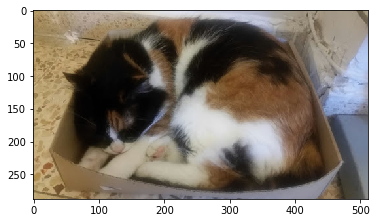

In [54]:
plt.imshow(img_rgb);

In [5]:
img_flat = img_rgb.reshape((img_rgb.shape[0] * img_rgb.shape[1], 3))

In [41]:
model = KMeans(n_clusters=5, init='random', random_state=88,n_init=2).fit(img_flat)

In [42]:
rel_amounts = ((np.bincount(model.labels_)*150)/len(model.labels_)).astype(int)
top_row_len = np.sum(rel_amounts)
top_vector = np.repeat(model.cluster_centers_.astype(int),rel_amounts,axis=0)
all_matrix = np.transpose(np.repeat(top_vector,150,axis=0).reshape(top_row_len,150,3),axes= (1,0,2))

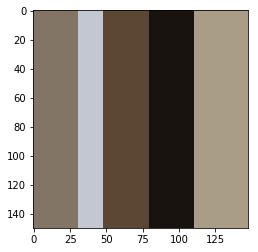

In [53]:
plt.imshow(all_matrix);

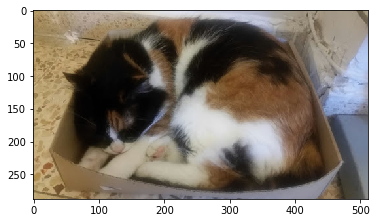

In [52]:
plt.imshow(img_rgb);

# replace each color in the image by the lead color of it's cluster

In [45]:
img_flat_k_colors = img_flat.copy()

In [46]:
img_flat_k_colors = model.cluster_centers_.astype(int)[model.labels_,:]

In [47]:
img_k_colors = img_flat_k_colors.reshape(288, 512, 3)

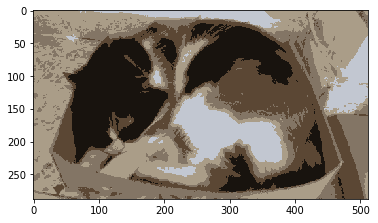

In [51]:
plt.imshow(img_k_colors);

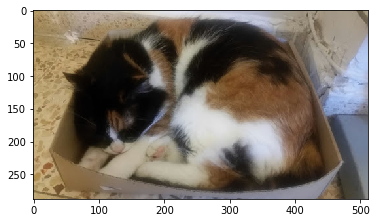

In [50]:
#original:
plt.imshow(img_rgb);